In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [12]:
logx = True
logy = True
ignore_70 = True

x_points = [10, 9, 8]
y_points = [23.108037900, 21.519907210, 19.676240520]

if not ignore_70:
    x_points.append(7)
    y_points.append(19.632506746)

if not (logx or logy):
    x_train = x_points + [0]
    y_train = y_points + [0]
else:
    if logx:
        x_train = np.log(x_points)
    else:
        x_train = x_points
    if logy:
        y_train = np.log(y_points)
    else:
        y_train = y_points

x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train)

regressor = LinearRegression()  
print(x_train, y_train)
regressor.fit(x_train, y_train) 

tmp = [6, 5, 4, 3, 2]
if ignore_70:
    tmp = [7] + tmp

x_pred = np.array(tmp)
if logx:
    x_pred = np.log(x_pred)

y_pred = regressor.predict(x_pred.reshape(-1,1))

print(regressor.coef_, regressor.intercept_)
print(y_pred)

if ignore_70:
    seventy_prediction = np.exp(y_pred[0])
    seventy_actual = 19.632506746
    scale = seventy_actual / seventy_prediction
    print(scale)

[[2.30258509]
 [2.19722458]
 [2.07944154]] [3.14018052 3.06897842 2.97941184]
[0.72125408] 1.4810863371800955
[2.88458197 2.77340016 2.6419     2.4809568  2.27346493 1.98102157]
1.0970280278289568


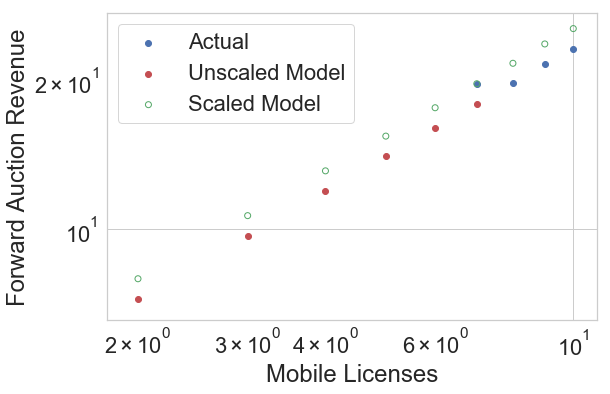

In [40]:
sns.set(font_scale=2, style='whitegrid')
plt.figure(figsize=(9,6))
# Plot the "for sure" points
plt.scatter([10, 9, 8, 7, 0], [23.108037900, 21.519907210, 19.676240520, 19.632506746, 0], color='b', label='Actual')
# Plot the modeled points
x_model = x_pred if not logx else np.exp(x_pred)
y_model = y_pred if not logy else np.exp(y_pred)
plt.scatter(x_model, y_model, color='r', label='Unscaled Model')
plt.scatter(np.concatenate((x_model, x_points)), np.concatenate((y_model, y_points)) * scale, color='g', label='Scaled Model', marker='o', facecolors='none')


plt.xlabel("Mobile Licenses")
plt.ylabel("Forward Auction Revenue")
if logy:
    plt.yscale('log')
if logx:
    plt.xscale('log')
    

# plt.ylim(bottom=0)
# plt.xlim(left=0)
# plt.savefig('forward_auction_extrapolated_costs', dpi=300)
plt.tight_layout()
plt.legend()
plt.savefig('fa_cost', dpi=300)